<a href="https://colab.research.google.com/github/sky16k/fps-3/blob/main/%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D1%81%D1%82%D0%B0%D1%82_2_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение библиотек

In [1]:
import pandas as pd
import seaborn as sns   #работа с красивыми графиками
import matplotlib.pyplot as plt   #работа с графиками

Загрузка и просмотр данных

In [2]:
df = pd.read_excel('FPS_lecture_df_0_height-weignt.xlsx')
df.head()

,ID,Gender,Height,Weight,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,10001.0,Male,174.782639,78.652188,NaN,weight,62.274369,72.453854,79.148132,87.877724
1,10002.0,Female,165.183571,74.332607,NaN,weight,62.412436,72.453854,79.148132,87.877724
2,10003.0,Male,181.542046,81.693920,NaN,NaN,NaN,NaN,NaN,NaN
3,10004.0,Female,167.845912,75.530661,NaN,NaN,NaN,NaN,NaN,NaN
4,10005.0,Female,160.475255,72.213865,NaN,NaN,NaN,NaN,NaN,NaN


Формирование выборок по полу

In [3]:
# Формирование выборок
df_1 = df[df['Gender'] == 'Male']
df_2 = df[df['Gender'] == 'Female']

print('Выборки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборки имеют одинаковую длинну:  True


Визуализация доверительных интервалов

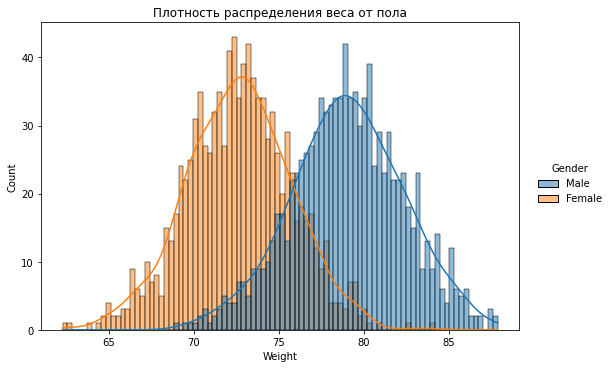

In [20]:
sns.displot(x='Weight', #разложить по значению в колонке 'Weight' 
            data=df,    #взять данные из df
            kde=True,   #добавить линию
            hue='Gender', #разделить по значению в колонке 'Gender'
            bins=90,    #разделить на 90 'корзин'
            aspect=1.5, #вытянуть ширину в 1.5 раза от высоты
            facet_kws={ #параметры сетки графиков
              'despine':False  #вернуть рамки графиков в сетке
              }) #
plt.title('Плотность распределения веса от пола') #название всей области графиков
#plt.legend(['Male', 'Female']) #подписи данных на графиках
plt.show()

In [19]:
#sns.distplot(df_1['Weight'],50)
#sns.distplot(df_2['Weight'],50)
#plt.title('Плотность распределения веса от пола')
#plt.legend(['Male', 'Female'])
#plt.show()

Подключения библиотек статистических критериев и задание уровня значимости

In [21]:
from scipy.stats import ttest_ind   #библиотека Т-теста - t-критерий Стьюдента
from scipy.stats import mannwhitneyu    #библиотека теста Манна-Уитни

alpha = 0.05                          # Уровень значимости

Проведение Т-Теста (t-критерий Стьюдента)

In [22]:
result = ttest_ind(df_1['Weight'], df_2['Weight'])
print('p-value: %.8f' % result.pvalue)    #до 8 знака после запятой

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


In [ ]:
# Вес мужчин статистически значимо отличатется от женщин

Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [23]:
result = mannwhitneyu(df_1['Weight'], df_2['Weight'])
print('p-value: %.8f' % result.pvalue)    #до 8 знака после запятой

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00000000
Отвергаем нулевую гипотезу


In [24]:
# Вес мужчин статистически значимо отличатется от женщин